<a href="https://colab.research.google.com/github/vbncml/gnn_explore_era/blob/main/Qm9_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

1.13.1+cu116
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [11]:
import torch
from torch_geometric.datasets import QM9

dataset = QM9('.')

print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Dataset: QM9(130831):
Number of graphs: 130831
Number of features: 11
Number of classes: 19

Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], idx=[1], name='gdb_1', z=[5])
Number of nodes: 5
Number of edges: 8
Average node degree: 1.60
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(G):
    plt.figure(figsize=(4,4))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     cmap="Set2")
    plt.show()

In [13]:
data = dataset[5]

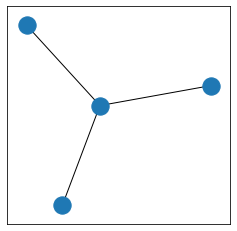

In [14]:
from torch_geometric.utils import to_networkx
qm9_graph = to_networkx(data, to_undirected=True)
visualize_graph(qm9_graph)

11 features for each node in QM9 are atomic coordinates provided in xyz format. "Atomic coordinate files are the data files that specify three-dimensional (3D) molecular structures. At a minimum, they must specify the positions of each atom in space, typically with X, Y and Z Cartesian coordinates, and the chemical element each atom represents." Reference: [link](https://https://proteopedia.org/wiki/index.php/Atomic_coordinate_file#:~:text=Atomic%20coordinate%20files%20are%20the,chemical%20element%20each%20atom%20represents.)

In [ ]:
data.x

tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 2.],
        [0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [ ]:
data.y

tensor([[ 2.1089e+00,  1.4180e+01, -7.2654e+00, -1.1048e+00,  6.1579e+00,
          5.9989e+01,  7.2390e-01, -3.1153e+03, -3.1152e+03, -3.1152e+03,
         -3.1158e+03,  6.4130e+00, -1.5557e+01, -1.5633e+01, -1.5710e+01,
         -1.4764e+01,  2.8549e+02,  3.8982e+01,  3.4299e+01]])

In [ ]:
data.edge_attr

tensor([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

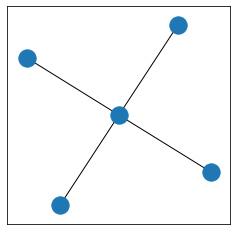

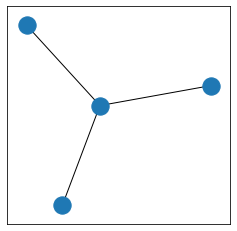

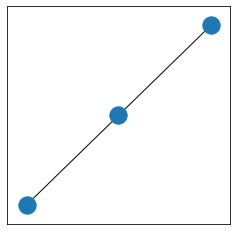

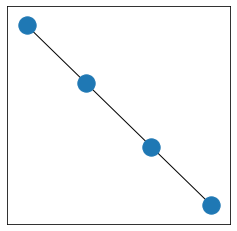

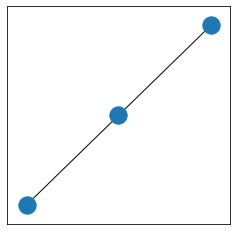

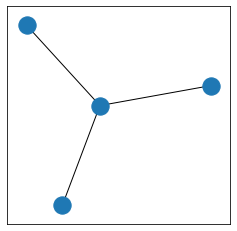

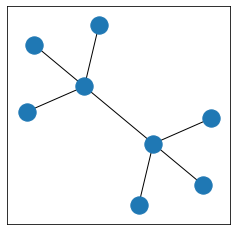

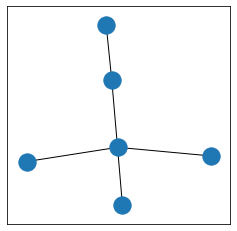

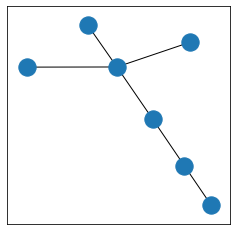

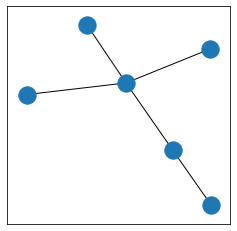

In [16]:
qm9_graphs = []
for i, each in enumerate(dataset[:10]):
  qm9_graph = to_networkx(each, to_undirected=True)
  qm9_graphs.append(qm9_graph)

for qm9_graph in qm9_graphs:
  visualize_graph(qm9_graph)